# Pregunta 4

# Obtención y análisis del conjunto de datos

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import keras

# Load file
df = pd.read_csv("./IndoorFingerprint.csv")

# Describe dataset
df.info()
df.describe()

# Partition train and test
inverse_mask = [] 
for index in range(0, len(df)):
    if (not index in mask_test):
        inverse_mask.append(index)

mask_test = np.loadtxt('mask_test.csv',dtype="i")
df_train = df.drop(index=mask_test)
df_test = df.drop(index=inverse_mask)

# Escalamiento
y_train = df_train.loc[:, ["X", "Y"]]
df_train.pop("X")
df_train.pop("Y")
scaler = StandardScaler().fit(df_train)
x_train = pd.DataFrame(scaler.transform(df_train), columns=df_train.columns)

y_test = df_test.loc[:, ["X", "Y"]]
df_test.pop("X")
df_test.pop("Y")
scaler = StandardScaler().fit(df_test)
x_test = pd.DataFrame(scaler.transform(df_test), columns=df_test.columns)

# Se debe convertir el y_train a cuadrantes enumerados


def position_to_quadrant(x, y):
    quadrant = ( (x // 8) + 1 ) + 6*((y - 5) // 4 )
    return int(quadrant) - 1

y_train = list(map(lambda elem: position_to_quadrant(elem[0], elem[1]), y_train.values))
y_test = list(map(lambda elem: position_to_quadrant(elem[0], elem[1]), y_test.values))

y_train = keras.utils.to_categorical(y_train, num_classes=24)
y_test = keras.utils.to_categorical(y_test, num_classes=24)








<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6600 entries, 0 to 6599
Data columns (total 10 columns):
X       6600 non-null float64
Y       6600 non-null float64
C1hA    6600 non-null int64
0kxZ    6600 non-null int64
tvMX    6600 non-null int64
OlYb    6600 non-null int64
7rk5    6600 non-null int64
F39L    6600 non-null int64
VNSF    6600 non-null int64
tkxI    6600 non-null int64
dtypes: float64(2), int64(8)
memory usage: 515.7 KB


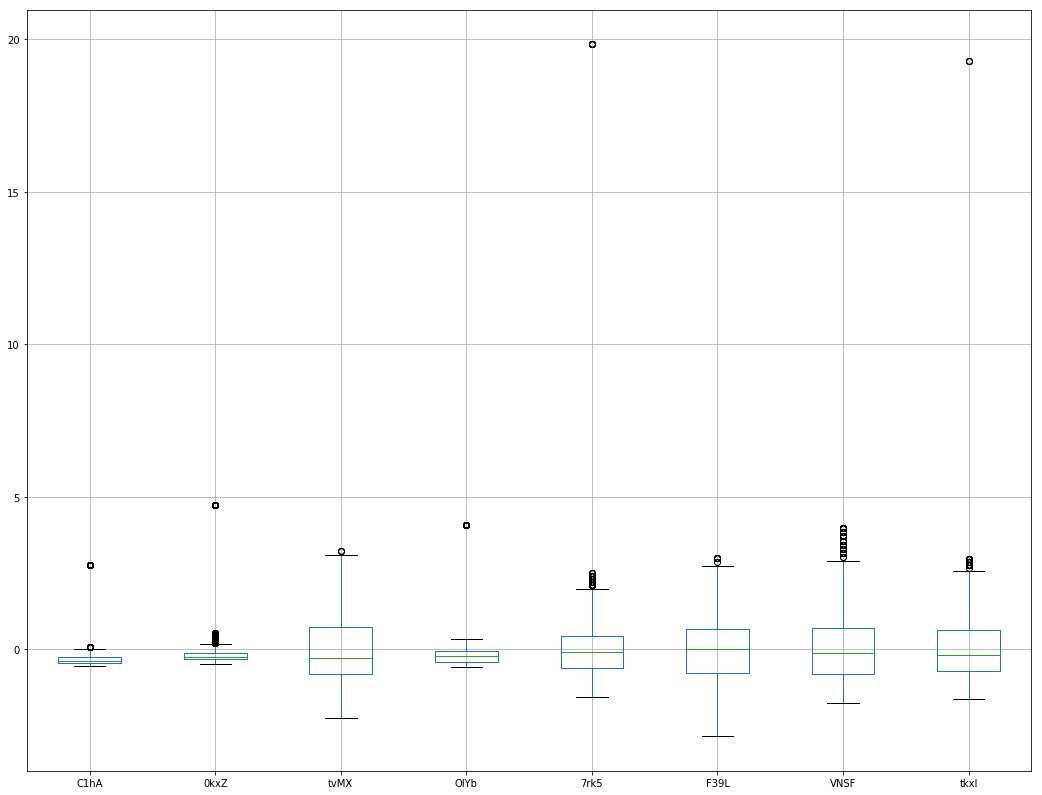

In [75]:
import matplotlib.pyplot as plt
x_train.boxplot(figsize=(18, 14))
plt.show()

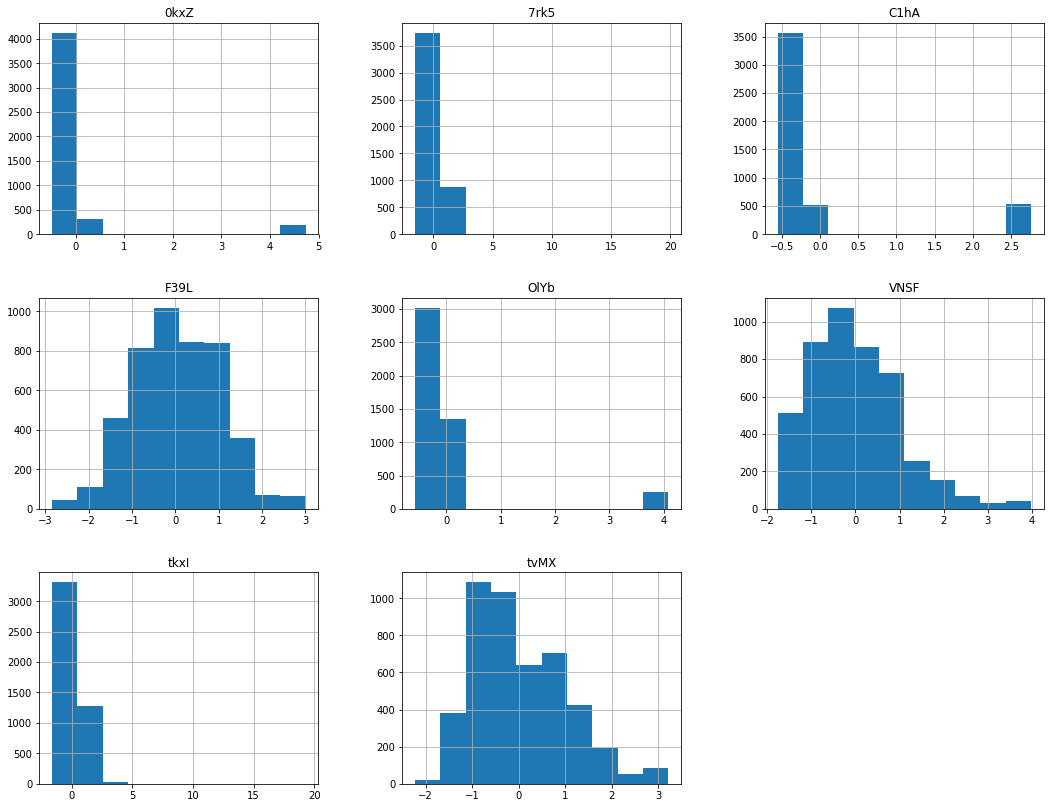

In [76]:
import matplotlib.pyplot as plt
x_train.hist(figsize=(18, 14))
plt.show()

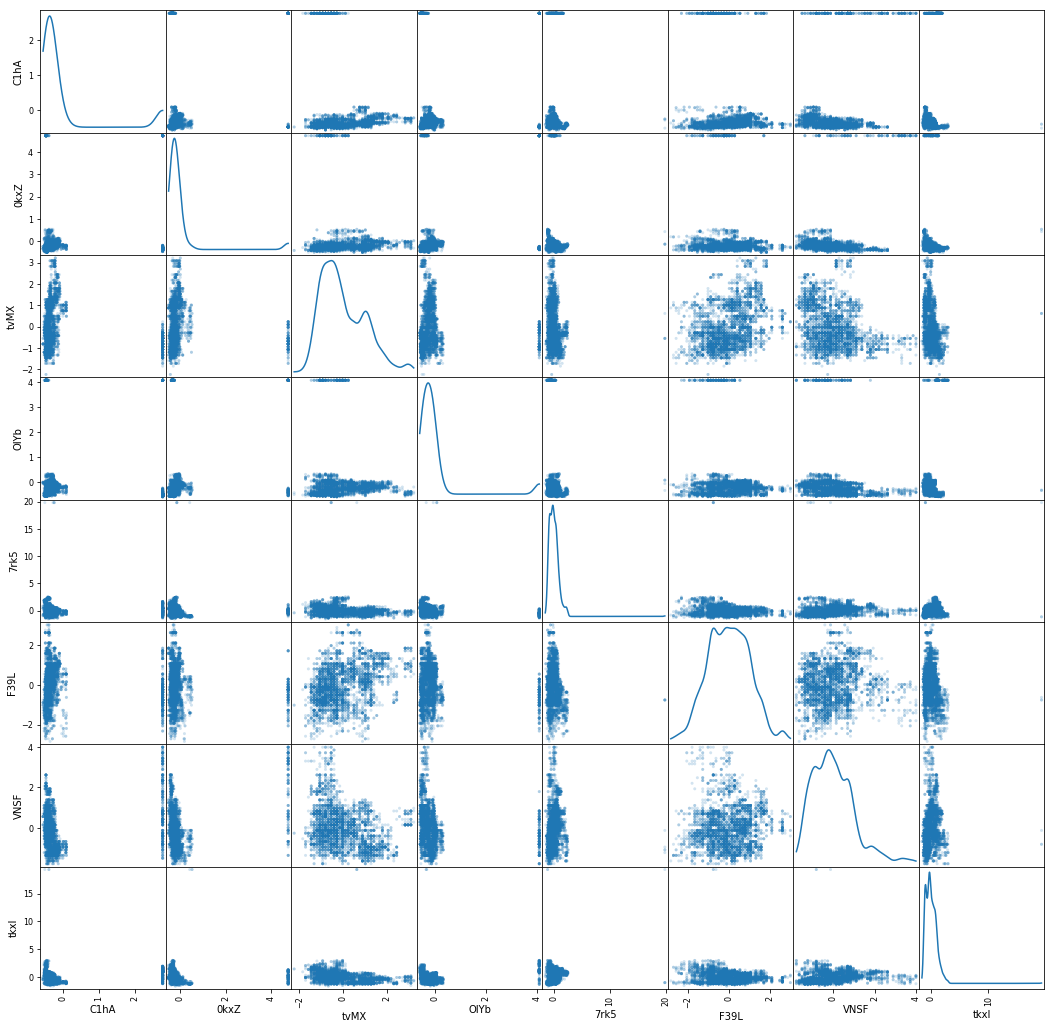

In [77]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
scatter_matrix(x_train, alpha=0.2, figsize=(18, 18), diagonal='kde')
plt.show()

# Esquema de entrenamiento

In [100]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import RMSprop

def define_neural_network():
    model = Sequential()
    
    # Input
    model.add(Dense(256, input_dim=x_train.shape[1], kernel_initializer='uniform'))
    model.add(Activation("relu"))
    model.add(Dense(128, kernel_initializer='uniform'))
    model.add(Activation("relu"))
    model.add(Dense(24, kernel_initializer='uniform'))
    model.add(Activation('sigmoid'))
    sgd = RMSprop(lr=0.001, decay=0.9)
    model.compile(optimizer=sgd,loss='categorical_crossentropy', metrics=["acc"])
    return model
    
    
define_neural_network().summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               2304      
_________________________________________________________________
activation_7 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_8 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 24)                3096      
_________________________________________________________________
activation_9 (Activation)    (None, 24)                0         
Total params: 38,296
Trainable params: 38,296
Non-trainable params: 0
_________________________________________________________________


In [101]:
model = define_neural_network()
model.fit(x_train, y_train, epochs=300,
        verbose=1, validation_data=(x_test, y_test))

Train on 4620 samples, validate on 1980 samples
Epoch 1/300
4620/4620 [==============================] - 1s 149us/step - loss: 2.0224 - acc: 0.3868 - val_loss: 1.2835 - val_acc: 0.5212
Epoch 2/300
4620/4620 [==============================] - 0s 73us/step - loss: 1.0393 - acc: 0.6433 - val_loss: 0.8708 - val_acc: 0.7040
Epoch 3/300
4620/4620 [==============================] - 0s 62us/step - loss: 0.8043 - acc: 0.7377 - val_loss: 0.7498 - val_acc: 0.7510
Epoch 4/300
4620/4620 [==============================] - 0s 70us/step - loss: 0.6860 - acc: 0.7784 - val_loss: 0.6843 - val_acc: 0.7611
Epoch 5/300
4620/4620 [==============================] - 0s 63us/step - loss: 0.6010 - acc: 0.8035 - val_loss: 0.6096 - val_acc: 0.7975
Epoch 6/300
4620/4620 [==============================] - 0s 59us/step - loss: 0.5467 - acc: 0.8245 - val_loss: 0.5281 - val_acc: 0.8278
Epoch 7/300
4620/4620 [==============================] - 0s 68us/step - loss: 0.4925 - acc: 0.8413 - val_loss: 0.5781 - val_acc: 0.7990

4620/4620 [==============================] - 0s 61us/step - loss: nan - acc: 0.0474 - val_loss: nan - val_acc: 0.0409
Epoch 62/300
4620/4620 [==============================] - 0s 66us/step - loss: nan - acc: 0.0474 - val_loss: nan - val_acc: 0.0409
Epoch 63/300
4620/4620 [==============================] - 0s 61us/step - loss: nan - acc: 0.0474 - val_loss: nan - val_acc: 0.0409
Epoch 64/300
4620/4620 [==============================] - 0s 61us/step - loss: nan - acc: 0.0474 - val_loss: nan - val_acc: 0.0409
Epoch 65/300
4620/4620 [==============================] - 0s 66us/step - loss: nan - acc: 0.0474 - val_loss: nan - val_acc: 0.0409
Epoch 66/300
4620/4620 [==============================] - 0s 82us/step - loss: nan - acc: 0.0474 - val_loss: nan - val_acc: 0.0409
Epoch 67/300
4620/4620 [==============================] - 0s 53us/step - loss: nan - acc: 0.0474 - val_loss: nan - val_acc: 0.0409
Epoch 68/300
4620/4620 [==============================] - 0s 63us/step - loss: nan - acc: 0.0474

4620/4620 [==============================] - 0s 68us/step - loss: nan - acc: 0.0474 - val_loss: nan - val_acc: 0.0409
Epoch 124/300
4620/4620 [==============================] - 0s 61us/step - loss: nan - acc: 0.0474 - val_loss: nan - val_acc: 0.0409
Epoch 125/300
4620/4620 [==============================] - 0s 68us/step - loss: nan - acc: 0.0474 - val_loss: nan - val_acc: 0.0409
Epoch 126/300
4620/4620 [==============================] - 0s 68us/step - loss: nan - acc: 0.0474 - val_loss: nan - val_acc: 0.0409
Epoch 127/300
4620/4620 [==============================] - 0s 61us/step - loss: nan - acc: 0.0474 - val_loss: nan - val_acc: 0.0409
Epoch 128/300
4620/4620 [==============================] - 0s 62us/step - loss: nan - acc: 0.0474 - val_loss: nan - val_acc: 0.0409
Epoch 129/300
4620/4620 [==============================] - 0s 63us/step - loss: nan - acc: 0.0474 - val_loss: nan - val_acc: 0.0409
Epoch 130/300
4620/4620 [==============================] - 0s 66us/step - loss: nan - acc:

4620/4620 [==============================] - 0s 57us/step - loss: nan - acc: 0.0474 - val_loss: nan - val_acc: 0.0409
Epoch 186/300
4620/4620 [==============================] - 0s 58us/step - loss: nan - acc: 0.0474 - val_loss: nan - val_acc: 0.0409
Epoch 187/300
4620/4620 [==============================] - 0s 58us/step - loss: nan - acc: 0.0474 - val_loss: nan - val_acc: 0.0409
Epoch 188/300
4620/4620 [==============================] - 0s 58us/step - loss: nan - acc: 0.0474 - val_loss: nan - val_acc: 0.0409
Epoch 189/300
4620/4620 [==============================] - 0s 57us/step - loss: nan - acc: 0.0474 - val_loss: nan - val_acc: 0.0409
Epoch 190/300
4620/4620 [==============================] - 0s 57us/step - loss: nan - acc: 0.0474 - val_loss: nan - val_acc: 0.0409
Epoch 191/300
4620/4620 [==============================] - 0s 56us/step - loss: nan - acc: 0.0474 - val_loss: nan - val_acc: 0.0409
Epoch 192/300
4620/4620 [==============================] - 0s 62us/step - loss: nan - acc:

KeyboardInterrupt: 